In [81]:
import pandas as pd
import matplotlib.pyplot as plt

In [82]:
train_lg = pd.read_csv('train.csv')
test_lg = pd.read_csv('test.csv')
train_sm = pd.read_csv('train_ns.csv')
test_sm = pd.read_csv('test_ns.csv')

In [83]:
trlg = train_lg.sample(100).reset_index()
telg = test_lg.sample(100).reset_index()
trsm = train_sm.sample(100).reset_index()
tesm = test_sm.sample(100).reset_index()

In [84]:
def plot(df, col):
    plt.plot(df.index, df[f'pred_{col}'])
    plt.plot(df.index, df[f'actual_{col}'])

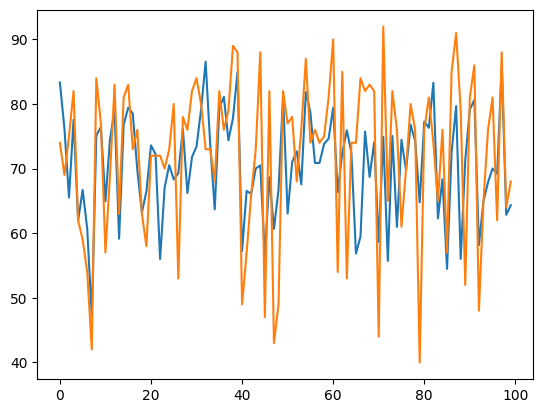

In [85]:
plot(trlg, 'ms')

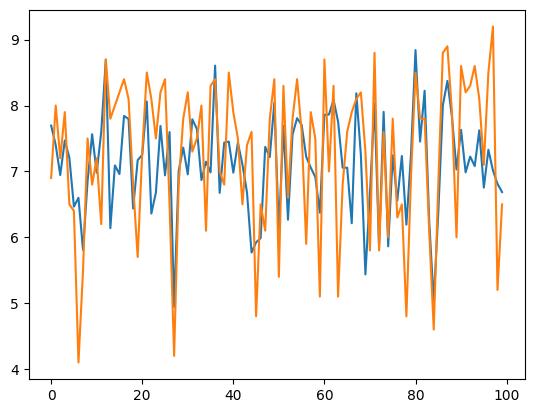

In [86]:
plot(trlg, 'us')

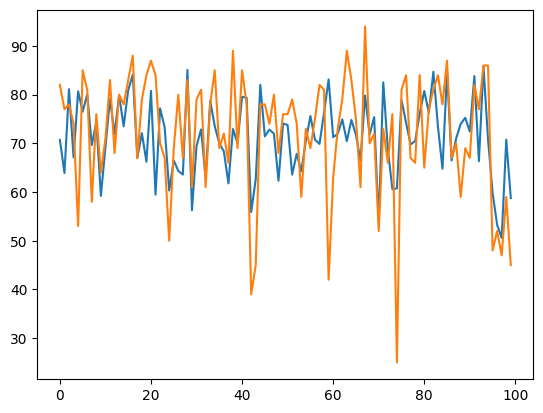

In [87]:
plot(telg, 'ms')

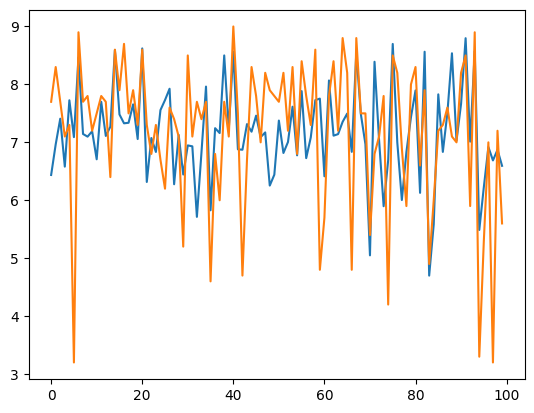

In [88]:
plot(telg, 'us')

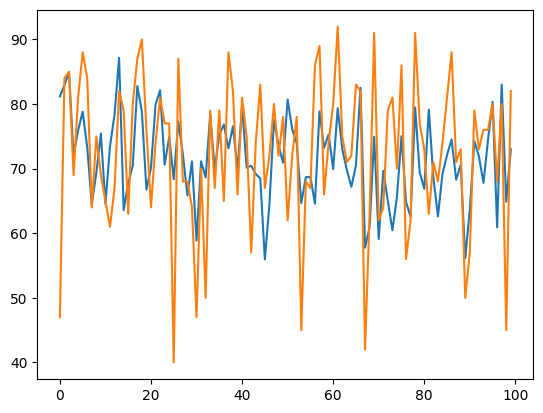

In [89]:
plot(trsm, 'ms')

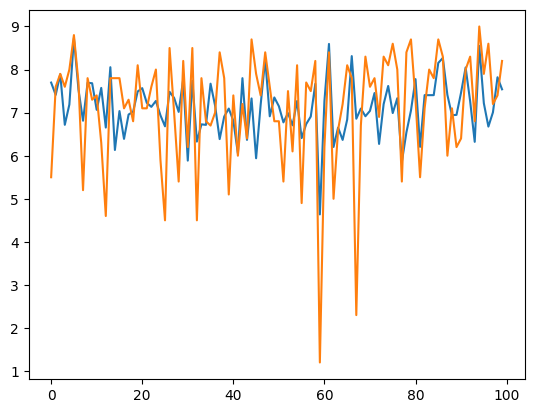

In [90]:
plot(trsm, 'us')

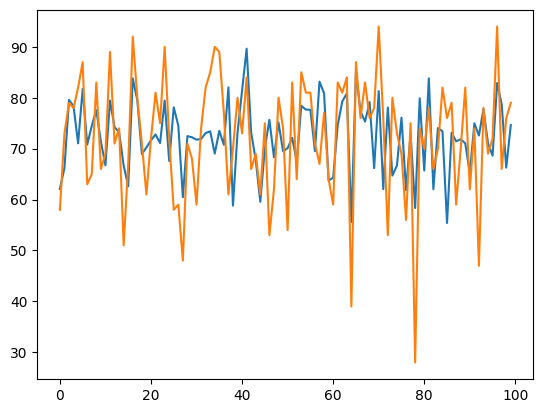

In [91]:
plot(tesm, 'ms')

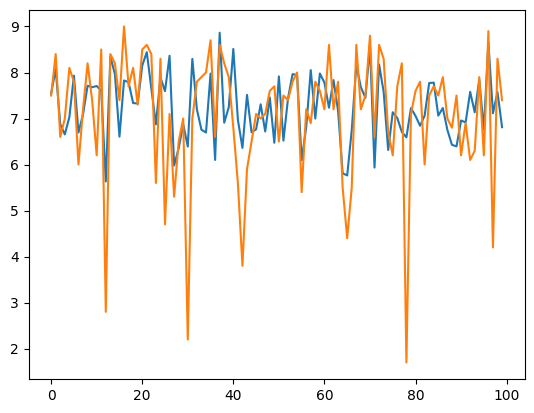

In [92]:
plot(tesm, 'us')

In [93]:
# xgboost to predict residuals

from xgboost import XGBRegressor

In [94]:
train_sm['ms_res'] = train_sm['pred_ms'] - train_sm['actual_ms']
train_sm['us_res'] = train_sm['pred_us'] - train_sm['actual_us']

test_sm['ms_res'] = test_sm['pred_ms'] - test_sm['actual_ms']
test_sm['us_res'] = test_sm['pred_us'] - test_sm['actual_us']

In [95]:
df = pd.read_csv('game_data/vectored_reviews.csv').drop(columns=['Unnamed: 0'])

In [96]:
X = df[df.columns[39:]].copy()
y = pd.concat([train_sm, test_sm]).sort_values(by='Unnamed: 0')

In [102]:
X_train = X.iloc[train_sm['Unnamed: 0']]
X_test = X.iloc[test_sm['Unnamed: 0']]

In [80]:
y_ms_train = train_sm['ms_res']
y_us_train = train_sm['us_res']

y_ms_test = test_sm['ms_res']
y_us_test = test_sm['us_res']

In [44]:
model = XGBRegressor(random_state=42)

In [111]:
from sklearn.model_selection import RandomizedSearchCV
from sklearn.metrics import make_scorer, r2_score
import numpy as np


parameters_xgb = {'xgbregressor__n_estimators': range(0, 200, 35),
                  'xgbregressor__max_depth': range(1, 30, 4),
                  'xgbregressor__max_leaves': range(0, 10, 3),
                  'xgbregressor__max_bin': range(250, 300, 10),
                  'xgbregressor__gamma': range(0, 10, 2),
                  'xgbregressor__learning_rate': np.arange(0, 1, 0.1),
                  'xgbregressor__reg_alpha': range(0, 6, 2),
                  'xgbregressor__reg_lambda': range(0, 6, 2)}
score = make_scorer(r2_score)

In [112]:
search_ms_xgb = RandomizedSearchCV(
    model, parameters_xgb, cv=5, n_iter=20, random_state=42, scoring=score)
search_ms_xgb.fit(X, y['ms_res'])
model_ms = search_ms_xgb.best_estimator_
model_ms.fit(X_train, y_ms_train)

search_us_xgb = RandomizedSearchCV(
    model, parameters_xgb, cv=5, n_iter=20, random_state=42, scoring=score)
search_us_xgb.fit(X, y['us_res'])
model_us = search_us_xgb.best_estimator_
model_us.fit(X_train, y_us_train)

[01:47:30] WARNING: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-03de431ba26204c4d-1/xgboost/xgboost-ci-windows/src/learner.cc:767: 
Parameters: { "xgbregressor__gamma", "xgbregressor__learning_rate", "xgbregressor__max_bin", "xgbregressor__max_depth", "xgbregressor__max_leaves", "xgbregressor__n_estimators", "xgbregressor__reg_alpha", "xgbregressor__reg_lambda" } are not used.

[01:47:34] WARNING: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-03de431ba26204c4d-1/xgboost/xgboost-ci-windows/src/learner.cc:767: 
Parameters: { "xgbregressor__gamma", "xgbregressor__learning_rate", "xgbregressor__max_bin", "xgbregressor__max_depth", "xgbregressor__max_leaves", "xgbregressor__n_estimators", "xgbregressor__reg_alpha", "xgbregressor__reg_lambda" } are not used.

[01:47:37] WARNING: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-03de431ba26204c4d-1/xgboost/xgboost-ci-windows/src/learner.cc:767: 
Parameters: { "xgbregressor__gamma

XGBRegressor(base_score=0.5, booster='gbtree', callbacks=None,
             colsample_bylevel=1, colsample_bynode=1, colsample_bytree=1,
             early_stopping_rounds=None, enable_categorical=False,
             eval_metric=None, feature_types=None, gamma=0, gpu_id=-1,
             grow_policy='depthwise', importance_type=None,
             interaction_constraints='', learning_rate=0.300000012, max_bin=256,
             max_cat_threshold=64, max_cat_to_onehot=4, max_delta_step=0,
             max_depth=6, max_leaves=0, min_child_weight=1, missing=nan,
             monotone_constraints='()', n_estimators=100, n_jobs=0,
             num_parallel_tree=1, predictor='auto', random_state=42, ...)

In [113]:
print('Train ms score: ', model_ms.score(X_train, y_ms_train))
print('Train us score: ', model_us.score(X_train, y_us_train))
print('Test ms score: ', model_ms.score(X_test, y_ms_test))
print('Test us score: ', model_us.score(X_test, y_us_test))

Train ms score:  0.9910174266441427
Train us score:  0.9863509112187838
Test ms score:  -0.1456339547314014
Test us score:  -0.1449164886606984


In [114]:
trsm

,index,Unnamed: 0,actual_ms,actual_us,pred_ms,pred_us
0,249,3927,47,5.5,81.168972,7.697727
1,2333,516,84,7.6,82.935693,7.412127
2,3965,5192,85,7.9,84.902959,7.891124
3,2379,2166,69,7.6,72.003820,6.717531
4,2467,5073,81,8.0,75.918433,7.188297
...,...,...,...,...,...,...
95,1670,5259,80,7.9,80.330536,7.219133
96,106,2223,68,8.6,60.907790,6.676034
97,2975,884,80,7.2,83.011219,7.006939
98,2044,3252,45,7.4,64.881035,7.821106


In [119]:
def add_pred(df):
    idx = df['index'].values
    vectors = X.iloc[idx]
    res_ms_pred = model_ms.predict(vectors)
    res_us_pred = model_us.predict(vectors)
    df_ = df.copy()
    df_['res_ms_pred'] = res_ms_pred
    df_['res_us_pred'] = res_us_pred
    df_['pred_ms'] = df_['pred_ms'] - df_['res_ms_pred']
    df_['pred_us'] = df_['pred_us'] - df_['res_us_pred']
    return df_

In [120]:
trsm_ = add_pred(trsm)
tesm_ = add_pred(tesm)

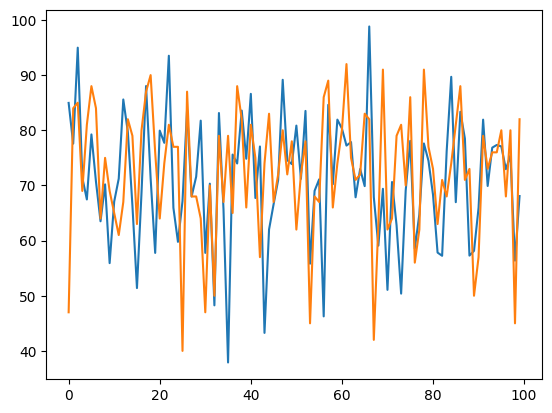

In [126]:
plot(trsm_, 'ms')

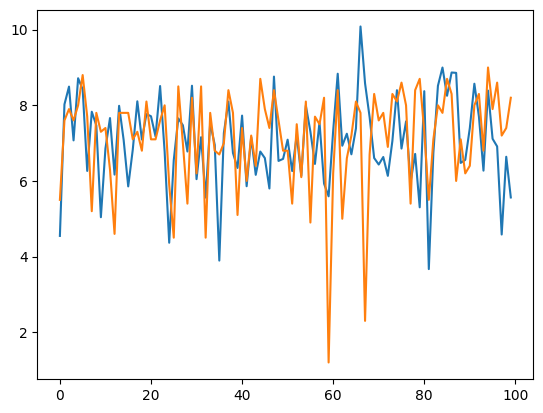

In [127]:
plot(trsm_, 'us')

In [ ]:
plot()